In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
%matplotlib inline
print(f" TensorFlow Version: {tf.__version__}")

 TensorFlow Version: 2.2.0


## Callbacks

[`tf.keras.callbacks.Callback()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)  is an abstract base class that can  be used to builed inherted callbaks to add functunalites to the tf.fit procedure. The base class have a series of methods that can we can acces to modefied their behavior:
* `on_train_begin(self,log=None)`
* `on_train_batch_begin(self,batch,logs=None)`
* `on_epoch_end(self,epoch,logs=None)`

And many more: click here to see more [Methods](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)

**Structure:**

In [5]:
class my_callback(tf.keras.callbacks.Callback):
    
    def on_train_begin(self,logs=None):
        # Do something at the start of training
        pass
    
    def on_train_batch_begin(self,batch,logs=None):
        # Do sommething at the start of every batch iteration
        pass
    
    
    def on_epoch_end(self,epoch,logs=None):
        # Do something at the end of every epoch 
        pass

## Using the logs dictionary
The `logs` dictionary stores the loss value, along with all of the metrics we are using at the end of a batch or epoch.

We can incorporate information from the `logs` dictionary into our own custom callbacks.

**EXAMPLE:**

### Load the dataset

In [6]:
### Load diabetes dataset from sklearn ###
diabetes_dataset = load_diabetes()

### Prepare the Data set:
some basic steps are:
* Rehsape the data (if applies)
* Normalize the data 
* Understand the data 

In [7]:
def overview(x,string):
    print(f"Overview {string}")
    print(f"shape: {x.shape} Data type: {type(x)}\n")
    
def normalize(y):
    return (y - y.mean(axis=0))/y.std()
        
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]
targets = normalize(targets)


### SPLIT DATA ###
x_train,x_test,y_train,y_test = train_test_split(data,targets,test_size=0.2)

print("DATA SPLIT \n")
overview(x_train,"x_train")
overview(x_test,"x_test")

DATA SPLIT 

Overview x_train
shape: (353, 10) Data type: <class 'numpy.ndarray'>

Overview x_test
shape: (89, 10) Data type: <class 'numpy.ndarray'>



### Create Model

#### Lets Define the Callback first:

In [53]:
# Create the custom callback

class LossAndMetricCallback(tf.keras.callbacks.Callback):

    # Print the loss after every second batch in the training set
    def on_train_batch_end(self, batch, logs=None):
        if batch %5 ==0:
            print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
    
    # Print the loss after each batch in the test set
    def on_test_batch_end(self, batch, logs=None):
        print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

    # Print the loss and mean absolute error after each epoch
    def on_epoch_end(self, epoch, logs=None):
        print('Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.'.format(epoch, logs['loss'], logs['mae']))
    
    # Notify the user when prediction has finished on each batch
    def on_predict_batch_end(self,batch, logs=None):
        print("Finished prediction on batch {}!".format(batch))

In [84]:
def regularized_model(x,wd,rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128 ,kernel_regularizer=tf.keras.regularizers.l2(wd) ,activation='relu',input_shape=(x.shape[1],)))
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'))
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'))  
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'))
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(wd),activation='relu'))
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(wd),activation='relu'))
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(1))
    
    return model

def compile_model(model):
    model.compile(optimizer="adam",loss="mse", metrics=["mae"])

## We can create a validation split in training ##
def train_model(model,x,y, **kwargs):
    return model.fit(x,y,epochs=40,validation_split=0.15,batch_size=64,verbose=False,**kwargs)

def evaluate_model(model,x,y):
    loss, mae =  model.evaluate(x ,y,verbose=False,callbacks=[LossAndMetricCallback()])
    print("\nTest Set Evaluation\n")
    print(f"Loss: {loss}")
    print(f"Mean Square Error: {mae}")
    
def plot_epochs(history,title):
    fig = plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title}: loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()



 After batch 0, the loss is    0.96.

 After batch 0, the loss is    0.97.
Epoch 0: Average loss is    0.99, mean absolute error is    0.86.

 After batch 0, the loss is    0.82.

 After batch 0, the loss is    0.96.
Epoch 1: Average loss is    1.01, mean absolute error is    0.86.

 After batch 0, the loss is    0.90.

 After batch 0, the loss is    0.96.
Epoch 2: Average loss is    0.99, mean absolute error is    0.85.

 After batch 0, the loss is    0.99.

 After batch 0, the loss is    0.95.
Epoch 3: Average loss is    0.99, mean absolute error is    0.85.

 After batch 0, the loss is    1.09.

 After batch 0, the loss is    0.95.
Epoch 4: Average loss is    0.98, mean absolute error is    0.85.

 After batch 0, the loss is    1.08.

 After batch 0, the loss is    0.93.
Epoch 5: Average loss is    0.97, mean absolute error is    0.84.

 After batch 0, the loss is    1.02.

 After batch 0, the loss is    0.91.
Epoch 6: Average loss is    0.93, mean absolute error is    0.81.

 Afte

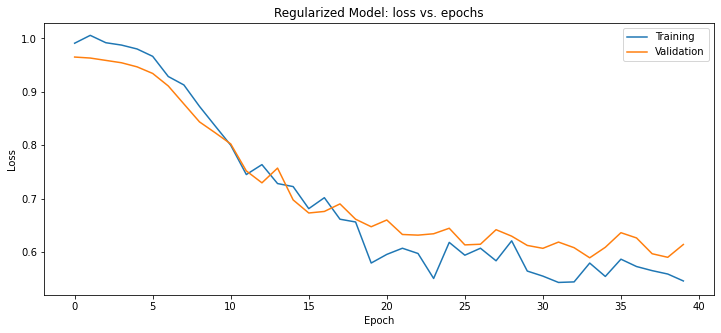

In [85]:
### REGULARIZED MODEL ###
model = regularized_model(x_train,wd=1e-5,rate=0.5) # Init regularized model
compile_model(model)                                # Compile regularized model
history = train_model(model,x_train,y_train,callbacks=[LossAndMetricCallback()])    # Train regularized model
plot_epochs(history,title="Regularized Model")      # Plot regularized model

## Built-in Callbacks
Callbacks are really powerfull, since they allow us to get direct feedback from training. The best part about callbacks is that there are some built in Callbacks, ready for our disposal 

### EarlyStopping
[Early Stoping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) enables the user to stop the fit() method when a metric is not imporving, some of the argumentes that this method takes are:
* monitor : Metric to track e.g loss or accuracy (use the same stings as history.history)
* min_delta : Minimum Difference that is considered and imporvement
* Patient: Number of consecutive epochs to terminate the train if performance get worse
* mode:  max or min (depending on the metric) e.g we want loss to go down (min) and accuracy to go up (max).

In [86]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


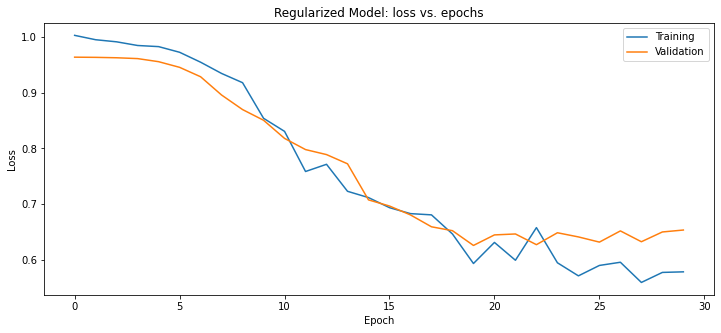

In [87]:
Early = tf.keras.callbacks.EarlyStopping(monitor='val_mae',min_delta=0.01,patience=10,mode="min")
### REGULARIZED MODEL ###
model = regularized_model(x_train,wd=1e-5,rate=0.5) # Init regularized model
compile_model(model)                                # Compile regularized model
history = train_model(model,x_train,y_train,callbacks=[Early])    # Train regularized model
plot_epochs(history,title="Regularized Model")      # Plot regularized model

Notice that in the prevous example we trained our model to 40 iterations, now thanks to early stopping we trained the model to 30 iterations

### Learning rate scheduler

**Usage:** `tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)`


This function `schedule` should take two arguments:
* The current epoch (as an integer)
* The current learning rate,

and return new learning rate for that epoch. 

The `LearningRateScheduler` also has an optional `verbose` argument, which prints information about the learning rate if it is set to 1.

Let's see a simple example.


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00011: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00012: LearningRateScheduler reducing learning rate to 0.0

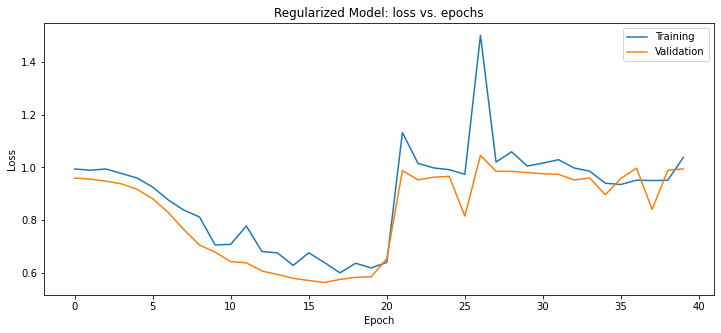

In [88]:
# Define the learning rate schedule function
def lr_function(epoch, lr):
    if epoch % 20 == 0:
        return lr + epoch/1000
    else:
        return lr
        

## Define call Back
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_function, verbose=1)

### REGULARIZED MODEL ###
model = regularized_model(x_train,wd=1e-5,rate=0.5) # Init regularized model
compile_model(model)                                # Compile regularized model
history = train_model(model,x_train,y_train,callbacks=[learning_rate_scheduler])    # Train regularized model
plot_epochs(history,title="Regularized Model")      # Plot regularized model

### CSV logger
**Usage** `tf.keras.callbacks.CSVLogger(filename, separator=',', append=False)`

This callback streams the results from each epoch into a CSV file.
The first line of the CSV file will be the names of pieces of information recorded on each subsequent line, beginning with the epoch and loss value. The values of metrics at the end of each epoch will also be recorded.

The only compulsory argument is the `filename` for the log to be streamed to. This could also be a filepath.

You can also specify the `separator` to be used between entries on each line.

The `append` argument allows you the option to append your results to an existing file with the same name. This can be particularly useful if you are continuing training.

Let's see an example.

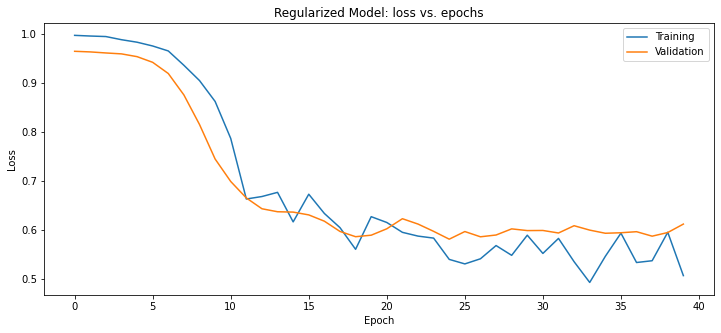

Chek your directory log to see the csv file


In [89]:
## Define call Back
csv_loger = tf.keras.callbacks.CSVLogger("logs/results.csv")

### REGULARIZED MODEL ###
model = regularized_model(x_train,wd=1e-5,rate=0.5)                  # Init regularized model
compile_model(model)                                                 # Compile regularized model
history = train_model(model,x_train,y_train,callbacks=[csv_loger])   # Train regularized model
plot_epochs(history,title="Regularized Model")                       # Plot regularized model

print("Chek your directory log to see the csv file")

### Lambda callbacks
**Usage** `tf.keras.callbacks.LambdaCallback(
        on_epoch_begin=None, on_epoch_end=None, 
        on_batch_begin=None, on_batch_end=None, 
        on_train_begin=None, on_train_end=None)`

Lambda callbacks are used to quickly define simple custom callbacks with the use of lambda functions.

Each of the functions require some positional arguments.
* `on_epoch_begin` and `on_epoch_end` expect two arguments: `epoch` and `logs`,
* `on_batch_begin` and `on_batch_end` expect two arguments: `batch` and `logs` and
* `on_train_begin` and `on_train_end` expect one argument: `logs`.

Let's see an example of this in practice.

Starting Epoch 1!
Starting Epoch 2!
Starting Epoch 3!
Starting Epoch 4!
Starting Epoch 5!
Starting Epoch 6!
Starting Epoch 7!
Starting Epoch 8!
Starting Epoch 9!
Starting Epoch 10!
Starting Epoch 11!
Starting Epoch 12!
Starting Epoch 13!
Starting Epoch 14!
Starting Epoch 15!
Starting Epoch 16!
Starting Epoch 17!
Starting Epoch 18!
Starting Epoch 19!
Starting Epoch 20!
Starting Epoch 21!
Starting Epoch 22!
Starting Epoch 23!
Starting Epoch 24!
Starting Epoch 25!
Starting Epoch 26!
Starting Epoch 27!
Starting Epoch 28!
Starting Epoch 29!
Starting Epoch 30!
Starting Epoch 31!
Starting Epoch 32!
Starting Epoch 33!
Starting Epoch 34!
Starting Epoch 35!
Starting Epoch 36!
Starting Epoch 37!
Starting Epoch 38!
Starting Epoch 39!
Starting Epoch 40!


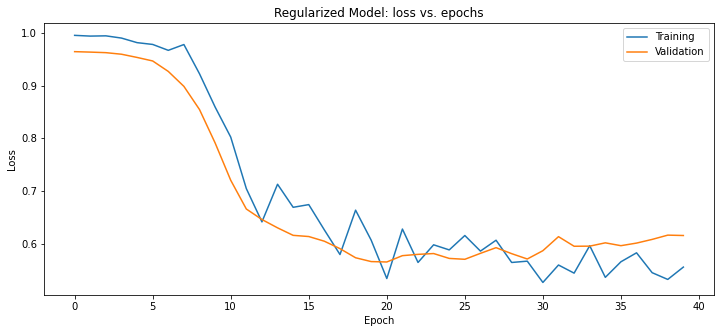

In [90]:
## Define call Back
epoch_callback = tf.keras.callbacks.LambdaCallback(on_epoch_begin=lambda epoch,logs: print('Starting Epoch {}!'.format(epoch+1)))

### REGULARIZED MODEL ###
model = regularized_model(x_train,wd=1e-5,rate=0.5)                     # Init regularized model
compile_model(model)                                                    # Compile regularized model
history = train_model(model,x_train,y_train,callbacks=[epoch_callback]) # Train regularized model
plot_epochs(history,title="Regularized Model")                          # Plot regularized model

Now we knoe tha basics of callbacks, the best part is that we can combine as many callbacks as we want to create a really interactive trainning sesson :)